In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_bias(qobj,cn=1,normcorr=False,fac=1.,frac=False,r2=0.23/0.51,r4=0.15/0.52):
    l, al = (np.loadtxt(qobj.f['TT'].al,usecols=(0,cn))).T
    l, n0 = (np.loadtxt(qobj.f['TT'].n0bs,usecols=(0,cn))).T
    #l, ml = (np.loadtxt(qobj.f['TT'].MFcl,usecols=(0,cn))).T
    l, cl, xl, kk = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,cn,3,4))).T
    if cn==2: ol = (np.loadtxt(qobj.f['TT'].cl[0])).T[2]
    if normcorr:
        xl = xl/r2
        cl = cl/r4
        n0 = n0/r4
        CL = cl-n0
        #CL = (cl-n0)*(kk/xl)**2*fac
        if cn == 2:
            ol = ol/r4
            OL = ol-n0
    else:
        CL = cl-n0
        if cn==2:
            OL = ol-n0
    if frac:
        pl.plot_1dstyle(fsize=[15,4],xmin=2,xmax=2048,ymin=.1,ymax=2.,ylab=r'Ratio of $C_L^{\kappa\kappa}$')
        plot(l,CL/kk,label='cl',color='r')
        plot(l,xl/kk,label='xl',color='g')
        axhline(1,color='k',ls='--')
        legend()
    else:
        pl.plot_1dstyle(fsize=[15,4],xmin=2,xmax=2048,ymin=1e-9,ymax=1e-5,ylog=True,ylab='$C_L^{\kappa\kappa}$')
        plot(l,al,label='norm',color='m')
        plot(l,n0,label='N0',color='y')
        #plot(l,ml,label='MF',color='b')
        plot(l,cl/99.,label='MF-MC',color='b',ls='--')
        plot(l,CL,label='cl',color='r')
        if cn==2:
            plot(l,OL,label='ol',color='c')
        plot(l,xl,label='xl',color='g')
        plot(l,kk,label='input',color='k')
        legend()
    return CL

In [3]:
dirs = local.data_directory()
aobj0 = local.init_analysis_params(qid='boss_s15d',fltr='cinv')
qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=500,qlist=['TT'])
aobj1 = local.init_analysis_params(qid='boss_s15d',fltr='none',wind='base',ivar='noivar')
qobj1 = quad_func.reconstruction(dirs['local'],aobj1.ids,stag=aobj1.stag,rlmin=500,qlist=['TT'])

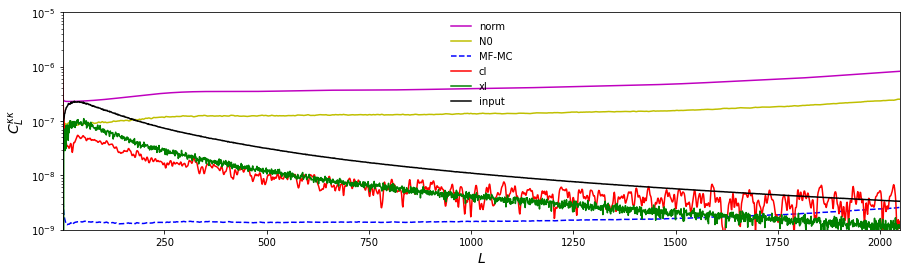

In [4]:
cl = plot_bias(qobj0)

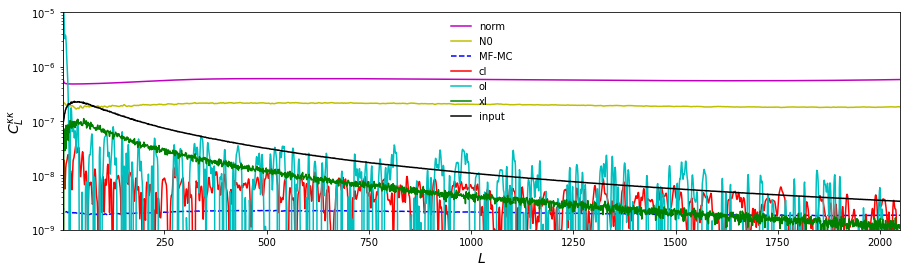

In [5]:
cl = plot_bias(qobj0,cn=2)

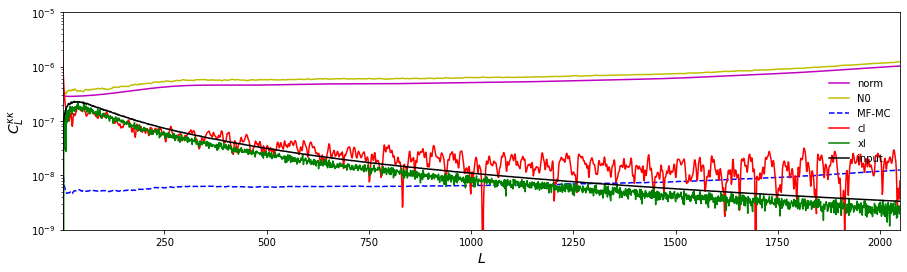

In [6]:
cl1 = plot_bias(qobj1)

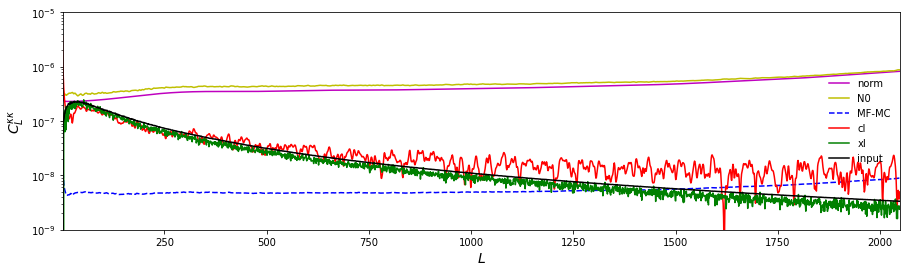

In [7]:
cl0 = plot_bias(qobj0,normcorr=True)

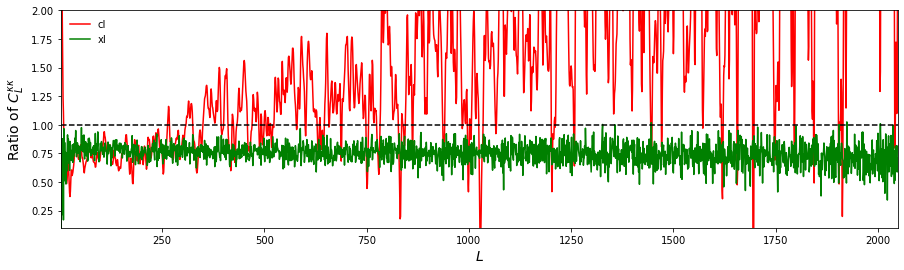

In [8]:
cl1 = plot_bias(qobj1,frac=True,normcorr=True,r2=1.,r4=1.)

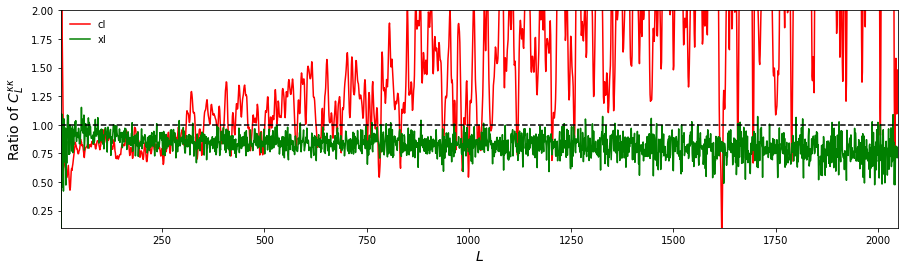

In [9]:
cl0 = plot_bias(qobj0,frac=True,normcorr=True)

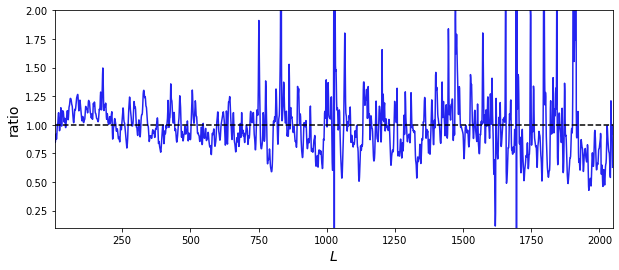

In [10]:
pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ymin=.1,ymax=2.,ylab='ratio')
plot(cl0/cl1)
axhline(1,color='k',ls='--')

9.11192819481662
obs A 1.0 mean(A) 1.001 sigma(A) 0.15 S/N 6.655 A>oA 0.8400000000000001


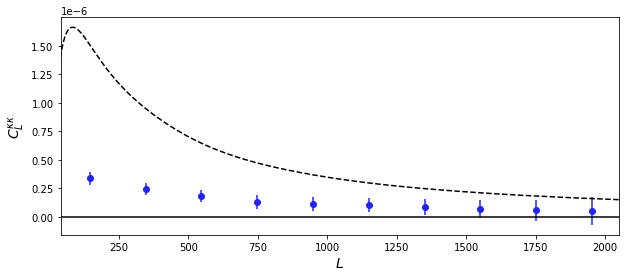

In [11]:
local.plot_spec_kk(qobj0)

6.6719617131445474
obs A 1.0 mean(A) 1.0 sigma(A) 0.196 S/N 5.11 A>oA 0.98


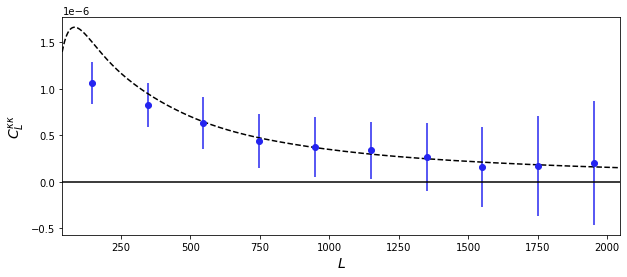

In [12]:
local.plot_spec_kk(qobj1)